# Installation

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


# Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Analysis

Reading the data

In [6]:
data = pd.read_csv(r"/Users/luoyuzhao/Desktop/churn_train.csv")
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,PROFITABILITY,LEAVE
0,one,119070,25,17,179158,541,4,4,0,0,0,3.42,LEAVE
1,one,40157,53,0,972459,220,26,8,1,3,1,5.35,STAY
2,zero,116959,211,0,245177,895,15,15,4,0,0,3.51,LEAVE
3,one,21118,52,7,413655,205,3,5,4,1,2,4.21,LEAVE
4,one,58114,154,50,258444,334,26,1,1,3,1,3.14,LEAVE


In [7]:
data.tail()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,PROFITABILITY,LEAVE
13995,zero,26739,69,0,865951,647,3,12,0,1,1,5.36,STAY
13996,one,151410,0,18,254619,212,1,4,0,1,0,5.41,STAY
13997,one,157246,55,0,691443,702,4,13,0,1,4,5.38,STAY
13998,zero,87365,191,51,826720,385,11,2,1,0,1,7.59,STAY
13999,one,50216,143,78,212462,154,0,1,0,1,0,3.20,LEAVE


In [8]:
data.shape

(14000, 13)

Exploratory Data Analysis (EDA)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COLLEGE                      14000 non-null  object 
 1   INCOME                       14000 non-null  int64  
 2   OVERAGE                      14000 non-null  int64  
 3   LEFTOVER                     14000 non-null  int64  
 4   HOUSE                        14000 non-null  int64  
 5   HANDSET_PRICE                14000 non-null  int64  
 6   OVER_15MINS_CALLS_PER_MONTH  14000 non-null  int64  
 7   AVERAGE_CALL_DURATION        14000 non-null  int64  
 8   REPORTED_SATISFACTION        14000 non-null  int64  
 9   REPORTED_USAGE_LEVEL         14000 non-null  int64  
 10  CONSIDERING_CHANGE_OF_PLAN   14000 non-null  int64  
 11  PROFITABILITY                14000 non-null  float64
 12  LEAVE                        14000 non-null  object 
dtypes: float64(1), i

In [10]:
data.describe(include='all')

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,PROFITABILITY,LEAVE
count,14000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEAVE
freq,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7339
mean,NaN,80401.494214,85.607286,24.176000,495668.320429,388.427929,7.997571,5.937786,1.571429,1.813143,1.354214,4.671369,NaN
std,NaN,41640.119267,86.061459,26.998324,251820.598852,211.480766,8.956283,4.340125,1.629970,1.509244,1.197852,1.531873,NaN
min,NaN,20002.000000,0.000000,0.000000,150042.000000,130.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.020000,NaN
25%,NaN,42449.250000,0.000000,0.000000,265028.000000,220.000000,1.000000,2.000000,0.000000,1.000000,0.000000,3.510000,NaN
50%,NaN,75972.500000,59.000000,15.000000,457200.500000,327.000000,4.000000,5.000000,1.000000,1.000000,1.000000,4.530000,NaN
75%,NaN,116089.750000,179.000000,42.000000,706812.000000,529.000000,14.000000,9.000000,4.000000,4.000000,2.000000,5.850000,NaN


In [11]:
data.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'PROFITABILITY', 'LEAVE'],
      dtype='object')

Correlation

/var/folders/qm/fjm070052bndtg7zdz6t_6f80000gn/T/ipykernel_14205/3727234097.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

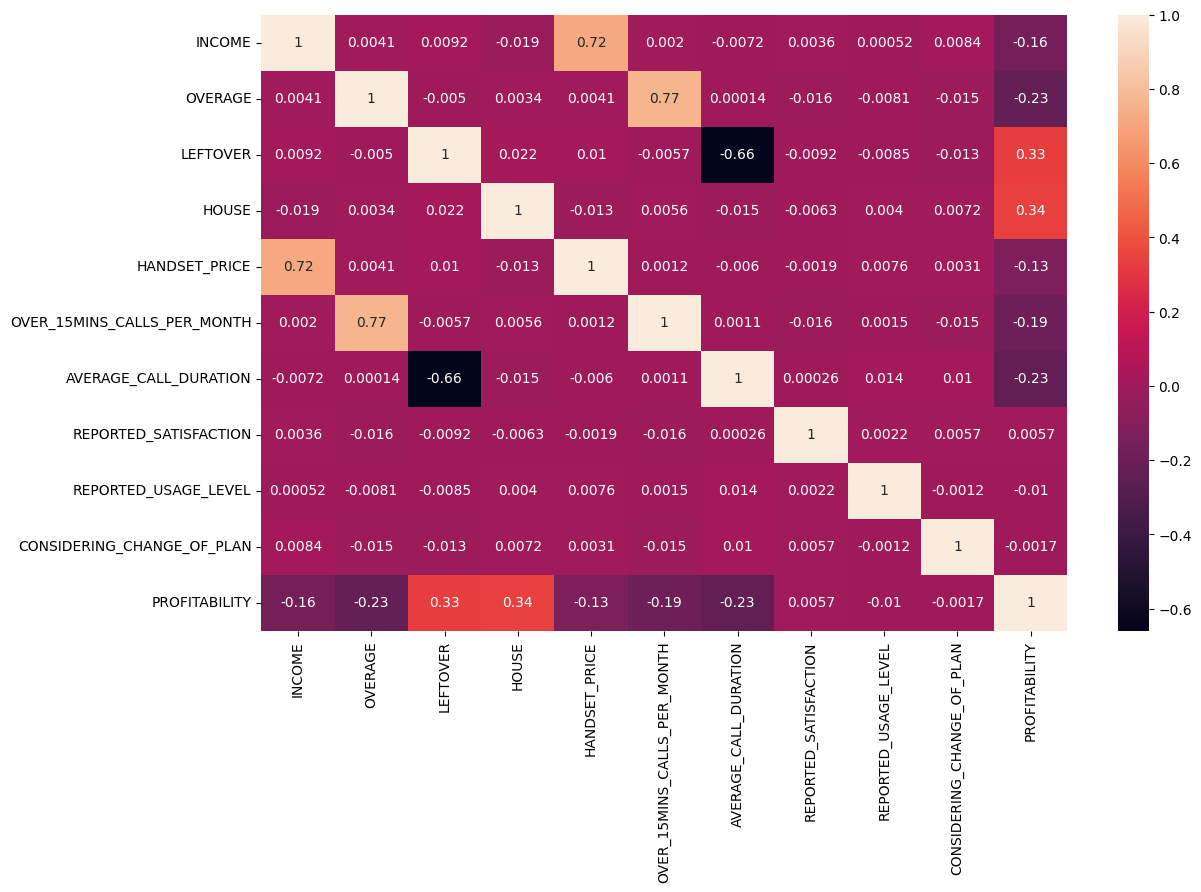

In [12]:
f, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(data.corr(), annot=True)

# Encoding Categorical Data

In [13]:
data = pd.get_dummies(data, drop_first=True)
data

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,PROFITABILITY,COLLEGE_zero,LEAVE_STAY
0,119070,25,17,179158,541,4,4,0,0,0,3.42,0,0
1,40157,53,0,972459,220,26,8,1,3,1,5.35,0,1
2,116959,211,0,245177,895,15,15,4,0,0,3.51,1,0
3,21118,52,7,413655,205,3,5,4,1,2,4.21,0,0
4,58114,154,50,258444,334,26,1,1,3,1,3.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,26739,69,0,865951,647,3,12,0,1,1,5.36,1,1
13996,151410,0,18,254619,212,1,4,0,1,0,5.41,0,1
13997,157246,55,0,691443,702,4,13,0,1,4,5.38,0,1
13998,87365,191,51,826720,385,11,2,1,0,1,7.59,1,1


# Splitting the Dataset to Train & Test set

In [15]:
X_res = data.drop('LEAVE_STAY', axis=1)
y_res = data['LEAVE_STAY']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [17]:
X_train,X_test,y_train,y_test

(       INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
 11756   87481        0         0  476500            270   
 3710    84169       40        19  687479            367   
 3571    34603      194        22  999951            192   
 6926    21577       65        79  997421            213   
 6224    94702        0        80  208481            849   
 ...       ...      ...       ...     ...            ...   
 5191   132043      197        64  436220            245   
 13418   26844       74        18  188488            230   
 5390    40431       61         0  967333            229   
 860     49465      189        80  549063            194   
 7270    68141        0         0  193406            375   
 
        OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  \
 11756                            1                     11   
 3710                             5                      4   
 3571                            18                      6   
 6926                         

# Feature Scaling

In [18]:
sc = StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:

X_train

array([[ 0.16947708, -1.00434968, -0.89493452, ..., -1.13018537,
        -0.06746378, -0.9930598 ],
       [ 0.09001618, -0.54098237, -0.19095456, ...,  0.53076151,
         0.93828867, -0.9930598 ],
       [-1.09916223,  1.24298177, -0.07979983, ..., -1.13018537,
         1.7677079 ,  1.00698871],
       ...,
       [-0.95933792, -0.29771453, -0.89493452, ...,  0.53076151,
         0.67052341,  1.00698871],
       [-0.74259584,  1.18506086,  2.06919162, ..., -0.29971193,
        -0.92953732,  1.00698871],
       [-0.29452466, -1.00434968, -0.89493452, ..., -0.29971193,
        -0.15236497,  1.00698871]])

# Logistic Regression

In [21]:
log = LogisticRegression()

In [22]:
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1 = log.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred1)

0.6621428571428571

In [25]:
precision_score(y_test,y_pred1)

0.6561264822134387

In [26]:
recall_score(y_test,y_pred1)

0.6189410887397464

In [27]:
f1_score(y_test,y_pred1)

0.6369915579432079

In [28]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[1024  435]
 [ 511  830]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1459
           1       0.66      0.62      0.64      1341

    accuracy                           0.66      2800
   macro avg       0.66      0.66      0.66      2800
weighted avg       0.66      0.66      0.66      2800



# Support Vector Classifier

In [29]:
svm = svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2 = svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.6832142857142857

In [33]:
precision_score(y_test,y_pred2)

0.682475884244373

In [34]:
recall_score(y_test,y_pred2)

0.6331096196868009

In [35]:
f1_score(y_test,y_pred2)

0.6568665377176015

# KNeighbors Classifier

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred3 = knn.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred3)

0.6396428571428572

In [40]:
precision_score(y_test,y_pred3)

0.6274961597542242

In [41]:
recall_score(y_test,y_pred3)

0.6092468307233407

In [42]:
f1_score(y_test,y_pred3)

0.6182368520620507

# Decision Tree Classifier

In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred4 = dt.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred4)

0.6110714285714286

In [47]:
precision_score(y_test,y_pred4)

0.5948795180722891

In [48]:
recall_score(y_test,y_pred4)

0.5891126025354213

In [49]:
f1_score(y_test,y_pred4)

0.5919820157362308

# Random Forest Classifier

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred5 = rf.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred5)

0.6992857142857143

In [54]:
precision_score(y_test,y_pred5)

0.7004016064257028

In [55]:
recall_score(y_test,y_pred5)

0.6502609992542878

In [56]:
f1_score(y_test,y_pred5)

0.674400618716164

# Gradient Boosting Classifier

In [57]:
gbc = GradientBoostingClassifier()

In [58]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [59]:
y_pred6 = gbc.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred6)

0.6914285714285714

In [61]:
precision_score(y_test,y_pred6)

0.6888361045130641

In [62]:
recall_score(y_test,y_pred6)

0.6487695749440716

In [63]:
f1_score(y_test,y_pred6)

0.6682027649769584

# Result and Visualization

In [64]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)],
                          'PRE':[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                                precision_score(y_test,y_pred3),
                                precision_score(y_test,y_pred4),
                                precision_score(y_test,y_pred5),
                                precision_score(y_test,y_pred6)]})

In [65]:
final_data

,Models,ACC,PRE
0,LR,0.662143,0.656126
1,SVC,0.683214,0.682476
2,KNN,0.639643,0.627496
3,DT,0.611071,0.594880
4,RF,0.699286,0.700402
5,GBC,0.691429,0.688836


<AxesSubplot: xlabel='Models', ylabel='ACC'>

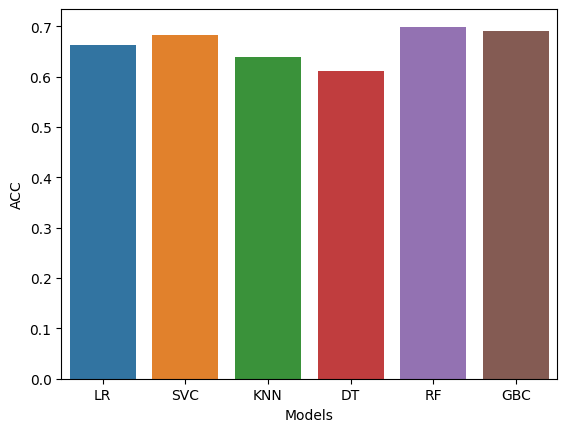

In [66]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

<AxesSubplot: xlabel='Models', ylabel='PRE'>

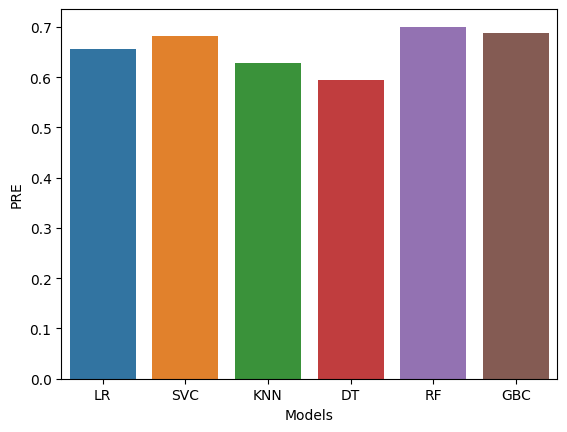

In [67]:
sns.barplot(x=final_data['Models'],y=final_data['PRE'])

Accroding to the performance of different models shown above, I select Random Forest Model

# Save the Model

In [68]:
X_res = sc.fit_transform(X_res)

In [69]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [70]:
import joblib

In [71]:
joblib.dump(rf,'churn_predict_model.pkl')

['churn_predict_model.pkl']

In [72]:
model = joblib.load('churn_predict_model.pkl')

In [73]:
data.columns

Index(['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'PROFITABILITY', 'COLLEGE_zero',
       'LEAVE_STAY'],
      dtype='object')

In [74]:
model.predict([[119070,25,17,179158,541,4,4,0,0,0,3.42,1]])

array([1], dtype=uint8)